In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.17f}'.format

In [2]:
tsv_path = "data/combined_results.tsv"
source_types = [
    "frame_count",
    "token_count"
]
source_types += [f"{n}gram" for n in [1,2,3,4,5]]

In [3]:
result_tsv = pd.read_csv(tsv_path, delimiter='\t')

In [4]:
approx_res = {
    'type': [],
    'slope': [],
    'fitness': [],
}

In [5]:
for type in source_types:
    approx_res['type'].append(type)
    slope, *_ = np.linalg.lstsq(
        result_tsv[type].to_numpy()[:, None],
        result_tsv["word_count"],
        rcond=None
    )
    slope = float(slope)
    approx_res["slope"].append(slope)
    approx = slope * result_tsv[type]
    approx_res["fitness"].append(
        ((approx - result_tsv["word_count"]) ** 2).mean()
    )

/tmp/ipykernel_6311/1521461559.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(slope)


In [6]:
approx_res_df = pd.DataFrame(approx_res)
approx_res_df

,type,slope,fitness
0,frame_count,0.14512503892360881,30.58004733860250468
1,token_count,0.63942505971298336,8.77220228751297881
2,1gram,0.27513405194748003,14.51291669032793230
3,2gram,0.42191877752093015,15.95850513456274378
4,3gram,0.56219960921710277,16.50245596448383623
5,4gram,0.66634618349045371,13.96281872353824305
6,5gram,0.71979412166101264,13.52803881142397557


In [7]:
def plot_approx(type : str):
    plt.scatter(result_tsv[type], result_tsv["word_count"], s=1)
    plt.plot(
        [0, 100 / approx_res["slope"][source_types.index(type)]],
        [0, 100],
        # approx_res["slope"][source_types.index(type)] * result_tsv[type],
        color='r',
    )
    plt.xlabel(type)
    plt.ylabel('word_count')
    plt.show()

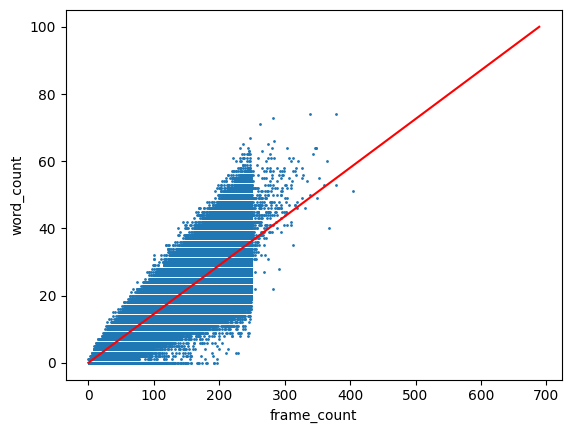

In [8]:
plot_approx("frame_count")

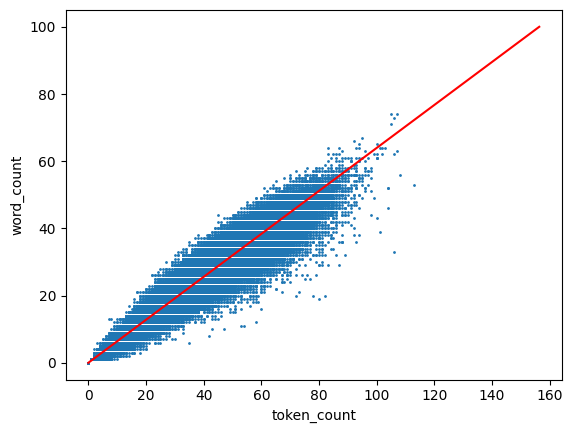

In [9]:
plot_approx("token_count")

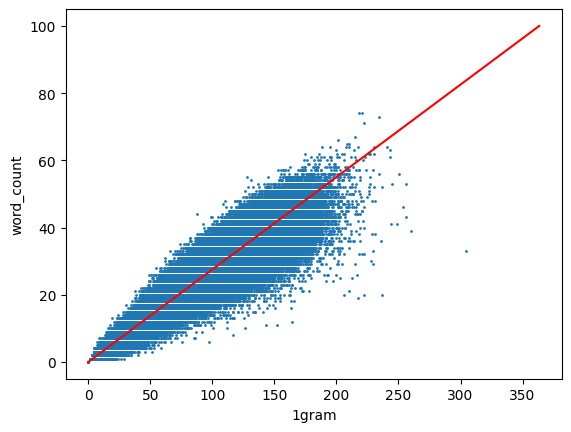

In [10]:
plot_approx("1gram")

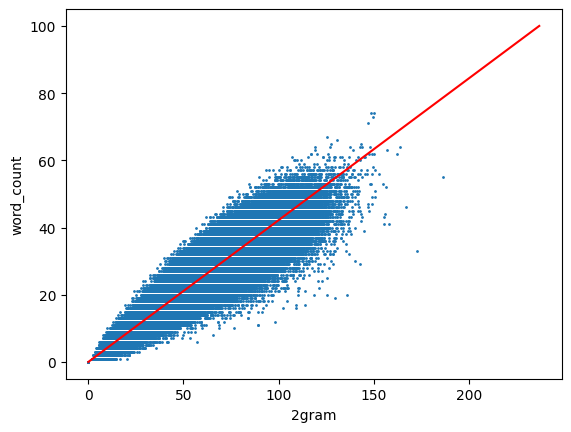

In [11]:
plot_approx("2gram")

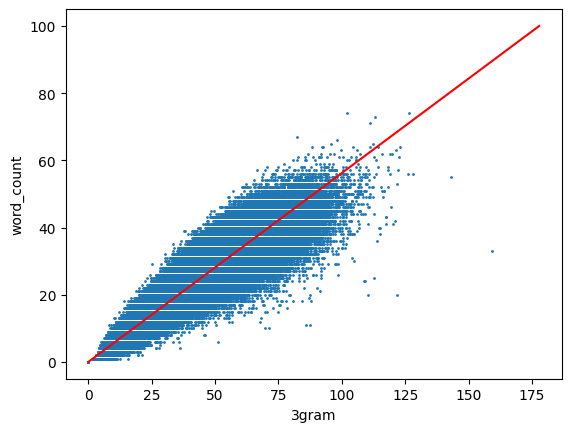

In [12]:
plot_approx("3gram")

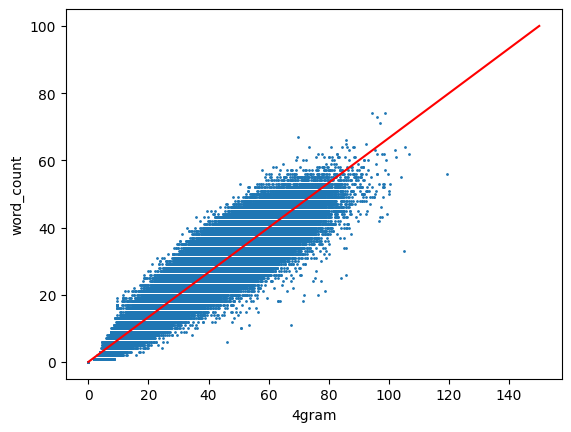

In [13]:
plot_approx("4gram")

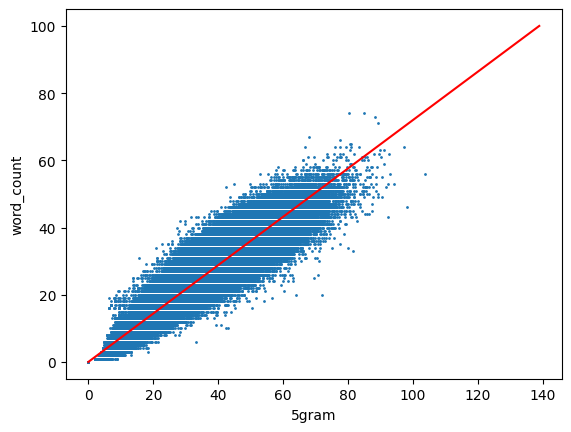

In [14]:
plot_approx("5gram")